# Computational Lingustics - Sentiment Analysis

In this lab, we are going to explore some sentiment analysis.Sentiment analysis in text is typically achieved by learning to solve a classification problem. The classes are typically,

 * Positive
 * Negative
 * Neutral

Let's take a look at some tweets from Donald Trump over the past year. Now we are going to use the [VADER sentiment analyzer](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf).

Read more about **VADER** (Valence Aware Dictionary and sEntiment Reasoner) [here](https://github.com/cjhutto/vaderSentiment/blob/master/README.rst).


In [1]:
#All the packages we are using in this project
import nltk, re, pprint

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
from nltk import FreqDist

## Lets import some libraries form mathplotlib ... it's helpful for plotting. 
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

All tweets from Donald Trump are stored in the file 'realDonaldTrump_tweets.txt' listed below.

## Text Analysis
For this text analysis we will look at the following:
 - Text [collocations](https://en.wikipedia.org/wiki/Collocation) to find common words that go together
 - Regular expressions to parse out hashtags and high frequency user accounts

In [2]:
file_path = '/dsa/data/all_datasets/linguistic/realDonaldTrump_tweets.txt'


Each line in this file is a tweet. So we will read the file into a set of lines, then we can use regular expressions to strip away symbols and web links in the tweets.

In [3]:
with open(file_path, 'r') as f:
    tweets = f.read().splitlines()
    tweets = [re.sub(r'[^\w]|https.*\b', ' ', t) for t in tweets]

print(tweets[0:10])  



['It was a great honor to have spoken before the countries of the world at the United Nations ', ' USAatUNGA UNGA  ', 'God bless the people of Mexico City  We are with you and will be there for you ', 'As President of the United States of America  I will ALWAYS put  AmericaFirst UNGA', 'Full remarks   ', 'Thehas great strength  amp  patience  but if it is forced to defend itself or its allies  we will have no choice but  ', 'RT  IvankaTrump  I have long respected India s accomplished and charismatic Foreign Minister  SushmaSwaraj  and it was an honor to meet her', 'Big day at the United Nations   many good things  and some tricky ones  happening  We have a great team  Big speech at 10 00 A M ', ' USAatUNGA  UNGA  ', 'We call for the full restoration of democracy and political freedoms in Venezuela  and we want it to happen very  v  ']


## Using the ` SentimentIntensityAnalyzer` to analyze tweets

In [4]:
analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(tweets[0])
print(type(vs))
print("{:-<65} {}".format(tweets[0], str(vs)))

<class 'dict'>
It was a great honor to have spoken before the countries of the world at the United Nations  {'neg': 0.0, 'neu': 0.581, 'pos': 0.419, 'compound': 0.8779}


**Read about scoring here:**https://github.com/cjhutto/vaderSentiment/blob/master/README.rst#about-the-scoring

If we process the entire tweet data set, maybe we can understand the trends!

In [5]:
analyzer = SentimentIntensityAnalyzer()
tweets_sentiment = [analyzer.polarity_scores(t) for t in tweets]

df = pd.DataFrame(tweets_sentiment)
df['tweet'] = tweets

df = df[['tweet', 'neg', 'neu', 'pos', 'compound']]

df.head()

,tweet,neg,neu,pos,compound
0,It was a great honor to have spoken before the...,0.0,0.581,0.419,0.8779
1,USAatUNGA UNGA,0.0,1.000,0.000,0.0000
2,God bless the people of Mexico City We are wi...,0.0,0.754,0.246,0.5994
3,As President of the United States of America ...,0.0,0.811,0.189,0.4215
4,Full remarks,0.0,1.000,0.000,0.0000


Let's look at the statistics of the measurements.


In [6]:
df.describe()

,neg,neu,pos,compound
count,3998.000000,3998.000000,3998.000000,3998.000000
mean,0.068681,0.697906,0.143122,0.124816
std,0.114564,0.278912,0.169294,0.481096
min,0.000000,0.000000,0.000000,-0.973500
25%,0.000000,0.596000,0.000000,0.000000
50%,0.000000,0.739000,0.099000,0.000000
75%,0.121000,0.896000,0.242000,0.510600
max,0.796000,1.000000,1.000000,0.980000


We see that the average compound score is 0.126, so slightly positive speech.

Note from the documentation, the standard classification: 

1. positive sentiment: compound score >= 0.05
1. neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
1. negative sentiment: compound score <= -0.05



In [7]:
df['sentiment'] = 'NEU'
df.loc[df['compound'] > 0.05, 'sentiment'] = 'POS'
df.loc[df['compound'] < -0.05, 'sentiment'] = 'NEG'

df.head()

,tweet,neg,neu,pos,compound,sentiment
0,It was a great honor to have spoken before the...,0.0,0.581,0.419,0.8779,POS
1,USAatUNGA UNGA,0.0,1.000,0.000,0.0000,NEU
2,God bless the people of Mexico City We are wi...,0.0,0.754,0.246,0.5994,POS
3,As President of the United States of America ...,0.0,0.811,0.189,0.4215,POS
4,Full remarks,0.0,1.000,0.000,0.0000,NEU


---

### Let's visualize!


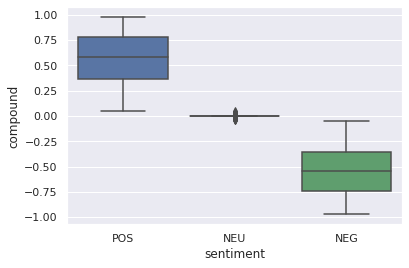

In [8]:
import seaborn as sns
sns.set()
sns.boxplot(x="sentiment", y="compound", data=df);

---
# Save notebook, then `File > Close and Halt`